In [14]:
import torch.nn as nn
import torch
from subfunc import data_loader
import random
import matplotlib.pyplot as plt

random.seed(1337)
torch.manual_seed(1337)

In [17]:
x, y, x_val, y_val, x_test, y_test = data_loader()
x = torch.tensor(x)
y = torch.tensor(y)
x_val = torch.tensor(x_val)
y_val = torch.tensor(y_val)
x_test = torch.tensor(x_test)
y_test = torch.tensor(y_test)
print("y shape", y.shape)
steps = 100 #400
sample, yoko, tate = x.shape
h1 = 80
h2 = 30
in_shape = yoko*tate
l1 = nn.Linear(in_shape,h1)
# nl1 = nn.LeakyReLU(0.2)
bn1 = nn.BatchNorm1d(h1)
nl1 = nn.ReLU()
# nl1 = nn.Softmax(dim=1)
l2 = nn.Linear(h1, h2)
bn2 = nn.BatchNorm1d(h2)
nl2 = nn.ReLU()
# nl2 = nn.Softmax(dim=1)
outl = nn.Linear(h2, 10)
input_data = torch.reshape(x, (sample, yoko*tate))
sample_val, yoko, tate = x_val.shape
x_val = torch.reshape(x_val, (sample_val, yoko*tate))

# optimizer and loss
params = list(l1.parameters()) + list(l2.parameters()) + list(outl.parameters())
lr=0.0002
optimizer = torch.optim.Adam(params, lr=lr)
loss_fn = nn.CrossEntropyLoss()

y shape torch.Size([60000])


In [18]:
for step in range(steps):

    output1 = l1(input_data)
    output1b = bn1(output1)
    output2 = nl1(output1b)  #non lenear 1
    output3 = l2(output2)
    output3b = bn2(output3)
    output4 = nl2(output3b) #non lenear 2
    output = outl(output4)

    if step == 21:
         lr = lr * 0.4
         for param_group in optimizer.param_groups:
            param_group['lr'] = lr
    
    if step == 35:
         lr = lr * 0.2
         for param_group in optimizer.param_groups:
            param_group['lr'] = lr
    
    if step == 200:
         lr = lr * 0.3
         for param_group in optimizer.param_groups:
            param_group['lr'] = lr
    
    if step == 300:
         lr = lr * 0.3
         for param_group in optimizer.param_groups:
            param_group['lr'] = lr


    loss_output = loss_fn(output, y)
    if step % 10 == 0:
        with torch.no_grad():

            # accuracy 
            preds = torch.argmax(output, dim=1)
            correct = (preds == y).sum().item()
            accuracy = correct / y.size(0)

            # validation
            output_val = l1(x_val)
            output_val = bn1(output_val)
            output_val = nl1(output_val)
            output_val = l2(output_val)
            output_val = bn2(output_val)
            output_val = nl2(output_val)
            output_val = outl(output_val)

            # validation loss
            val_loss = loss_fn(output_val, y_val)

            # calculate validation accuracy
            preds_val = torch.argmax(output_val, dim=1)
            correct_val = (preds_val == y_val).sum().item()
            val_accuracy = correct_val / y_val.size(0)

        print(f"{step:2d} iter -> loss output :{loss_output.item():.4f} | lr: {lr:7f} | Accuracy: {accuracy*100:.2f}%| Val Loss: {val_loss.item():.4f} | Val Acccuracy: {val_accuracy*100:.2f}%")
    
    loss_output.backward()
    optimizer.step()

 0 iter -> loss output :2.3855 | lr: 0.000200 | Accuracy: 11.40%| Val Loss: 2.3908 | Val Acccuracy: 11.98%
10 iter -> loss output :1.8977 | lr: 0.000200 | Accuracy: 37.89%| Val Loss: 1.9324 | Val Acccuracy: 35.78%
20 iter -> loss output :1.6871 | lr: 0.000200 | Accuracy: 55.86%| Val Loss: 1.7201 | Val Acccuracy: 54.84%
30 iter -> loss output :1.6260 | lr: 0.000080 | Accuracy: 60.46%| Val Loss: 1.6598 | Val Acccuracy: 59.84%
40 iter -> loss output :1.5936 | lr: 0.000016 | Accuracy: 62.97%| Val Loss: 1.6283 | Val Acccuracy: 62.06%
50 iter -> loss output :1.5808 | lr: 0.000016 | Accuracy: 63.98%| Val Loss: 1.6159 | Val Acccuracy: 62.90%
60 iter -> loss output :1.5664 | lr: 0.000016 | Accuracy: 65.05%| Val Loss: 1.6019 | Val Acccuracy: 63.86%
70 iter -> loss output :1.5511 | lr: 0.000016 | Accuracy: 66.14%| Val Loss: 1.5870 | Val Acccuracy: 64.94%
80 iter -> loss output :1.5354 | lr: 0.000016 | Accuracy: 67.27%| Val Loss: 1.5716 | Val Acccuracy: 65.76%
90 iter -> loss output :1.5195 | lr: 

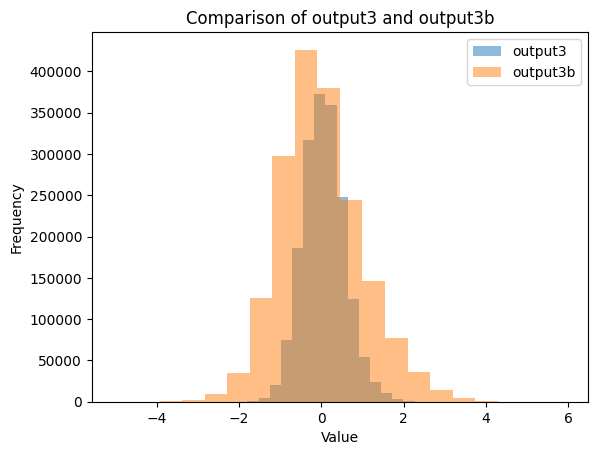

In [28]:
# Assuming output3 and output3b are tensors, you need to flatten them and convert to a list
# output1_flat = output1.view(-1).tolist()
# output1b_flat = output1b.view(-1).tolist()
output3_flat = output3.view(-1).tolist()
output3b_flat = output3b.view(-1).tolist()

# Create the histogram
# plt.hist(output1_flat, bins=20, alpha=0.5, label='output1')
# plt.hist(output1b_flat, bins=20, alpha=0.5, label='output1b')
plt.hist(output3_flat, bins=20, alpha=0.5, label='output3')
plt.hist(output3b_flat, bins=20, alpha=0.5, label='output3b')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison of output3 and output3b')

# Add a legend to differentiate the two histograms
plt.legend()

# Show the plot
plt.show()